Programme informatique pour la PSSS

In [31]:
#Importation 
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [32]:
#initialisation des variables

nb_opinion = 50 #nombre d'individus dans le modèle

T = 15 #nombre d'itération dans la simulation 

On étudie le modèle BC (bounded-confidence)

insérer la formule ici

In [33]:
 
 
def graph_evolution(opinions_over_time,T):

  times=np.arange(T + 1)
  cmap = plt.get_cmap('viridis', nb_opinion)
  plt.plot(times,opinions_over_time, linewidth=0.8)  
  plt.xlabel("opinions")
  plt.ylabel("Temps")

  plt.show()

On commence par étudier le cas où la confiance est symétrique

In [1]:
# Fonction de mise à jour des opinions selon le modèle de confiance limitée
def update_opinions_symetry(opinions):
    new_opinions = np.copy(opinions)
    for i in range(nb_opinion):
        neighbors = [j for j in range(nb_opinion) if abs(opinions[j] - opinions[i]) <= epsilon]
        if neighbors:
            new_opinions[i] = np.mean([opinions[j] for j in neighbors])
    return new_opinions

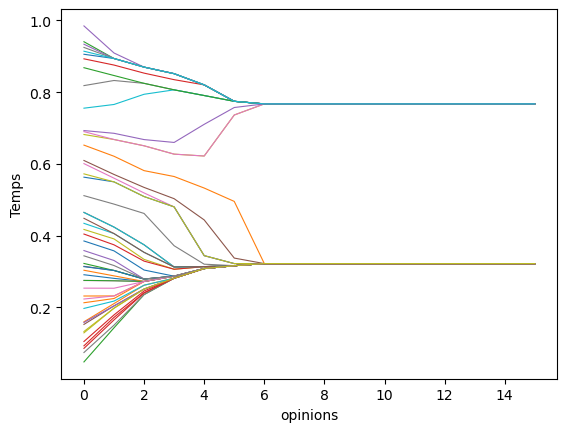

In [35]:
#première simulation dans le cas symétrique

epsilon = 0.2

opinions_over_time = list()
opinions = np.random.uniform(0, 1, nb_opinion)
opinions_over_time.append(opinions)

# Parcourir chaque individu dans la liste d'opinions
for time in range(T):
    opinions = update_opinions_symetry(opinions)
    opinions_over_time.append(opinions)

    

graph_evolution(opinions_over_time,T)
        



On s'intérresse au cas où la confiance est asymétrique 





In [36]:
def update_opinions_asymetry(opinions):
    new_opinions = np.copy(opinions)
    for i in range(nb_opinion):
        neighbors = [j for j in range(nb_opinion) if -epsilon_left <= opinions[j] - opinions[i] <= epsilon_right ]
        if neighbors:
            new_opinions[i] = np.mean([opinions[j] for j in neighbors])
    return new_opinions

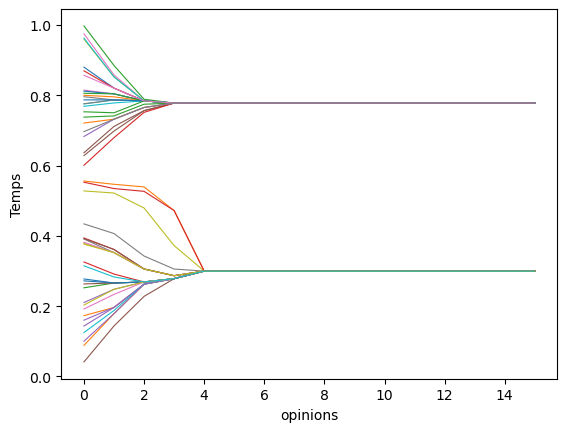

In [37]:
# simulation dans le cas asymétrique

epsilon_left = 0.2
epsilon_right = 0.2

opinions_over_time = list()
opinions = np.random.uniform(0, 1, nb_opinion)
opinions_over_time.append(opinions)

# Parcourir chaque individu dans la liste d'opinions
for time in range(T):
    opinions = update_opinions_asymetry(opinions)
    opinions_over_time.append(opinions)

    

graph_evolution(opinions_over_time,T)

on étudie désormais le cas où la confiance dpéend de la confiance

In [38]:
def biais_opinion(personnal_opinion, m, epsilon_bar):
    
    f = m*personnal_opinion + (1 - m)/2
    epsilon_right = f*epsilon_bar
    epsilon_left = epsilon_bar - epsilon_right

    return epsilon_right, epsilon_left



In [39]:
def update_opinions_dependant_asymetry(opinions, m, epsilon_bar):
    new_opinions = np.copy(opinions)
    for i in range(nb_opinion):
        personnal_opinion =  opinions[i]
        epsilon_right, epsilon_left = biais_opinion(personnal_opinion, m, epsilon_bar)
        neighbors = [j for j in range(nb_opinion) if - epsilon_left <= opinions[j] - opinions[i] <= epsilon_right ]
        if neighbors:
            new_opinions[i] = np.mean([opinions[j] for j in neighbors])
    
    return new_opinions



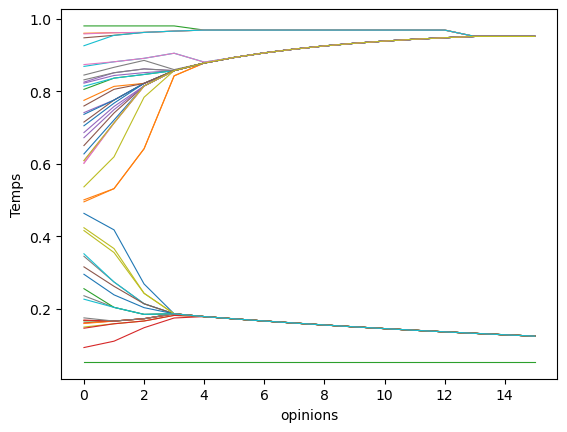

In [43]:
# simulation dans le cas asymétrique avec dépendance à l'opinion

epsilon_bar = 0.6
m = 0.99

opinions_over_time = list()
opinions = np.random.uniform(0, 1, nb_opinion)
opinions_over_time.append(opinions)

# Parcourir chaque individu dans la liste d'opinions
for time in range(T):
    opinions = update_opinions_dependant_asymetry(opinions, m, epsilon_bar)
    opinions_over_time.append(opinions)

    

graph_evolution(opinions_over_time,T)

In [41]:
print(biais_opinion(1, 0.99, 1))

(0.995, 0.0050000000000000044)
